# Import

In [1]:
import os
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

import random
import scipy.stats as ss

# Load dataset (TR55)

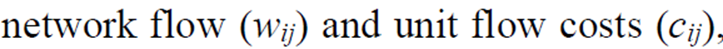

In [7]:
dir_name = os.path.dirname(os.path.realpath('__file__'))

file_name = 'TR55'
file_path = os.path.join(dir_name,file_name + '.csv')

# Load demand data
w = pd.read_csv(file_path,nrows=55,header=None)
w.index += 1
w.columns += 1

# Load unit cost data
c = pd.read_csv(file_path,skiprows = 56,nrows=55,header=None)
c.index += 1
c.columns += 1

In [8]:
w

1       2      3       4       5      6       7      8      9      10  \
1        0   17493  14827  112387   48225   5382   30183   5449   7115  10899   
2    17174       0   4910   37216   15969   1782    9995   1804   2356   3609   
3    14536    4903      0   31499   13516   1508    8459   1527   1994   3055   
4   116190   39190  33217       0  108040  12058   67619  12208  15941  24418   
5    48130   16234  13760  104299       0   4995   28010   5057   6603  10115   
6     5250    1771   1501   11377    4882      0    3055    552    720   1103   
7    29833   10062   8529   64649   27740   3096       0   3135   4093   6270   
8     5316    1793   1520   11520    4943    552    3094      0    729   1117   
9     6947    2343   1986   15055    6460    721    4043    730      0   1460   
10   10663    3597   3048   23107    9915   1107    6206   1120   1463      0   
11    7031    2372   2010   15237    6538    730    4092    739    965   1478   
12   59843   20184  17108  129681   55645   6210   34827   6288   8210  12576   
13   12771    4307   3651   27674   11875   1325    7432   1342   1752   2684   
14   16431    5542   4697   35606   15278   1705    9562   1726   2254   3453   
15   37933   12794  10845   82201   35272   3937   22076   3986   5204   7972   
16   11047    3726   3158   23940   10273   1146    6429   1161   1516   2322   
17   15669    5285   4480   33955   14570   1626    9119   1646   2150   3293   
18   19460    6564   5563   42171   18095   2020   11325   2045   2670   4090   
19   35735   12053  10216   77438   33228   3708   20797   3755   4903   7510   
20   14399    4857   4117   31204   13389   1494    8380   1513   1976   3026   
21    5114    1725   1462   11081    4755    531    2976    537    702   1075   
22    6476    2184   1851   14033    6022    672    3769    680    888   1361   
23   34842   11752   9961   75503   32398   3616   20277   3661   4780   7322   
24   14119    4762   4036   30595   13128   1465    8217   1483   1937   2967   
25   46169   15573  13199  100050   42931   4791   26869   4851   6334   9703   
26  320661  108156  91673  694878  298169  33277  186616  33692  43993  67389   
27   96757   32635  27662  209674   89970  10041   56310  10166  13275  20334   
28   29385    9911   8401   63678   27324   3049   17101   3087   4031   6175   
29    6933    2339   1982   15025    6447    720    4035    729    951   1457   
30   33494   11297   9576   72582   31145   3476   19493   3519   4595   7039   
31   61793   20842  17666  133907   57459   6413   35962   6493   8478  12986   
32   18094    6103   5173   39209   16824   1878   10530   1901   2482   3802   
33   35024   11813  10013   75899   32568   3635   20383   3680   4805   7361   
34   27752    9361   7934   60140   25806   2880   16151   2916   3807   5832   
35   19435    6555   5556   42116   18072   2017   11311   2042   2666   4084   
36   12458    4202   3561   26996   11584   1293    7250   1309   1709   2618   
37   33580   11326   9600   72769   31225   3485   19543   3528   4607   7057   
38    7220    2435   2064   15647    6714    749    4202    759    991   1517   
39    6173    2082   1765   13378    5740    641    3593    649    847   1297   
40   17167    5790   4908   37202   15963   1782    9991   1804   2355   3608   
41    2556     862    731    5539    2377    265    1488    269    351    537   
42   40228   13569  11501   87176   37407   4175   23412   4227   5519   8454   
43   18817    6347   5380   40778   17498   1953   10951   1977   2582   3955   
44   16945    5716   4845   36721   15757   1759    9862   1780   2325   3561   
45   10867    3665   3107   23550   10105   1128    6325   1142   1491   2284   
46    2659     897    760    5763    2473    276    1548    279    365    559   
47    6658    2246   1903   14428    6191    691    3875    700    913   1399   
48   12543    4231   3586   27180   11663   1302    7300   1318   1721   2636   
49    5037    1699   1440   10916    46

In [9]:
c

1     2     3     4     5     6     7     8     9     10  ...    46  \
1      0   330   966   490   558  1046   895   768   633   732  ...   808   
2    330     0   648   757   888   766  1225  1059   349   414  ...   653   
3    966   648     0  1057  1430   391  1567  1359   359   234  ...   305   
4    490   757  1057     0   544   999   530   313   905  1098  ...   796   
5    558   888  1430   544     0  1468   510   474  1191  1290  ...  1195   
6   1046   766   391   999  1468     0  1479  1271   417   536  ...   343   
7    895  1225  1567   530   510  1479     0   246  1424  1617  ...  1293   
8    768  1059  1359   313   474  1271   246     0  1207  1400  ...  1085   
9    633   349   359   905  1191   417  1424  1207     0   197  ...   304   
10   732   414   234  1098  1290   536  1617  1400   197     0  ...   450   
11   671  1001  1430   422   122  1421   396   352  1204  1397  ...  1195   
12   837  1128  1416   382   537  1328   151    95  1276  1469  ...  1142   
13  1102  1399  1687   653   717  1599   207   366  1547  1740  ...  1413   
14   575   700   826   244   783   755   774   557   732   925  ...   552   
15   523   205   443   912  1081   561  1418  1214   144   209  ...   448   
16  1168  1439  1634   682   919  1546   411   479  1540  1733  ...  1360   
17   487   283   501   759  1045   559  1278  1061   146   339  ...   395   
18   688   979  1290   233   424  1232   297    80  1127  1320  ...  1029   
19   206   150   760   673   764   878  1101   974   461   526  ...   740   
20   725   711   545   628  1112   371  1108   900   544   690  ...   240   
21   785   679   383   773  1172   334  1270  1062   382   528  ...    78   
22   899   665   434  1366  1457   770  1794  1667   509   340  ...   739   
23   191   320   956   681   749  1036  1086   959   623   722  ...   872   
24   620   950  1379   421   130  1417   395   351  1153  1346  ...  1144   
25    69   399  1035   483   489  1115   887   760   702   801  ...   877   
26   939  1210  1405   453   724  1317   394   250  1311  1504  ...  1131   
27   901  1231  1636   579   446  1578   173   417  1434  1627  ...  1375   
28   333   437   811   320   619   849   839   622   585   778  ...   576   
29   375   571   945   186   573   966   705   488   719   912  ...   710   
30   828  1099  1294   342   613  1206   283   139  1200  1393  ...  1020   
31   356   686  1115   258   323  1153   545   418   889  1082  ...   880   
32   674  1004  1368   311   364  1310   221   110  1205  1398  ...  1107   
33   883  1213  1618   561   428  1560   137   381  1416  1609  ...  1357   
34   186   164   812   593   744   880  1081   895   467   578  ...   716   
35   531   296   518   998  1089   656  1426  1299   239   284  ...   543   
36   743   463   245  1015  1301   453  1534  1317   114    83  ...   367   
37   729   753   754   419   958   580   899   691   720   899  ...   449   
38   706   388   331  1099  1264   633  1601  1401   284    97  ...   547   
39   875   899   919   434   978   745   859   651   875  1064  ...   614   
40  1071  1342  1537   585   856  1449   382   382  1443  1636  ...  1263   
41   622   418   423   818  1180   461  1328  1120   145   338  ...   260   
42   343   109   623   810   901   741  1238  1111   324   389  ...   628   
43   473   612   839   218   685   854   748   531   697   890  ...   604   
44   754  1025  1220   268   759  1132   493   285  1126  1319  ...   946   
45   265   593   967   225   463  1005   687   523   741   934  ...   732   
46   808   653   305   796  1195   343  1293  1085   304   450  ...     0   
47   290   620  1128   369   376  1166   658   531   902  1022  ...   893   
48   619   301   369  1012  1177   614  1514  1314   197   135  ...   501   
49   769  1040  1169   283   803  1072   582   374  1075  1268  ...   895   
50  1048   768   306  1110  1483   119  1590  1382   419   467  ...   358   
51  1069   751   143  1167  1540   343  1677  1469   473   337  ...   415   
52

## Predefined Functions

In [10]:
def check_feasibility(array, n, p):
        flag = True
        hubs = list(set(array))
        for i in range(n):
            if i+1 in hubs:
                if array[i] == i+1:
                    flag *= True
                else:
                    flag *= False
        return flag

## initial solution

In [11]:
def initial_solution(n, p):  
    
    hubs = random.sample(range(1,n),p)
    array = [None] * n
    for i in range(n):
        if i+1 in hubs:
            array[i] = i+1    
        else:
            array[i] = hubs[random.randint(0,p-1)]
    return array

In [12]:
np.random.seed(5)
# test
initial_solution(55, 3)

[3,
 22,
 3,
 3,
 3,
 22,
 22,
 51,
 22,
 3,
 3,
 51,
 22,
 3,
 51,
 3,
 3,
 3,
 3,
 51,
 22,
 22,
 3,
 3,
 51,
 3,
 51,
 51,
 22,
 22,
 3,
 51,
 22,
 51,
 3,
 3,
 22,
 51,
 22,
 3,
 3,
 51,
 51,
 51,
 3,
 51,
 22,
 3,
 22,
 51,
 51,
 3,
 22,
 3,
 51]

## solution evaluation (cost calculation)

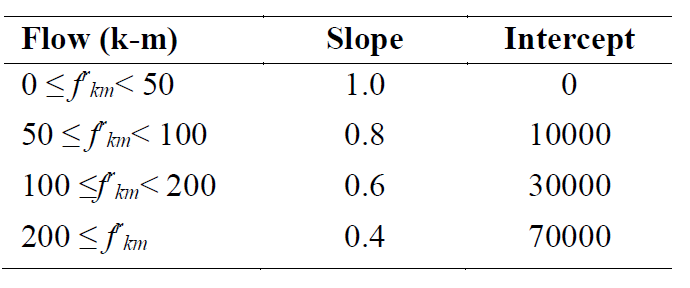

In [13]:
def flowloc_cost_2(flow):
    unit_flow_cost = 0
    
    if flow <0:
        raise ValueError("Flow must be nonnegative")
    elif flow < 50000:
        unit_flow_cost = 0 + 1* flow
    elif flow < 100000:
        unit_flow_cost = 10000 + 0.8* flow
    elif flow < 200000:
        unit_flow_cost = 30000 + 0.6* flow
    else:
        unit_flow_cost = 70000 + 0.4* flow
    return unit_flow_cost


def cost_evaluation(array, w, c):
    total_cost = 0
    
    # identify the hubs
    hubs = set(array)
    
    # calculate collection and distribution cost
    for i in range(1, len(array)+1):
        for j in range(1, len(array)+1):
            total_cost += w[i][j]*(c[i][array[i-1]] + c[array[j-1]][j])
    
    # calculate inter-hub cost
    for k in hubs:
        for m in hubs:
            if k != m:
                interhub_flow = 0
                for i in range(1, len(array)+1):
                    for j in range(1, len(array)+1):
                        if array[i-1] == k and array[j-1] == m:
                            interhub_flow += w[i][j]                   # calculate inter-hub flow
                            
                total_cost += flowloc_cost_2(interhub_flow) * c[k][m]  # calculate inter-hub cost
                
    return total_cost

# GA

## class

In [14]:
iterations = 100

In [15]:
class Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def ga(self):
        while True:
            parent_1 = initial_solution(self.n, self.p)
            parent_2 = initial_solution(self.n, self.p)

            cutting_point = random.randint(0, 9)
            offspring = parent_1[:cutting_point] + parent_2[cutting_point:]

            if len(set(offspring)) == self.p and check_feasibility(offspring, self.n, self.p):
                break

        return offspring
    
    def ga_best(self):
        ga_initial = self.ga()
        best_ga = ga_initial
        best_ga_cost = cost_evaluation(ga_initial, w, c)

        i = 1
        while i < iterations:
            next_solution = self.ga()
            ga_cost = cost_evaluation(next_solution, w, c)

            if ga_cost < best_ga_cost:
                best_ga = next_solution
                best_ga_cost= ga_cost

            i += 1

        return best_ga, best_ga_cost

In [16]:
time_start = time.time()  

first_ga = Ga(55, 3)
print(first_ga.ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([4, 14, 14, 4, 4, 29, 4, 4, 14, 14, 4, 14, 29, 14, 29, 29, 4, 4, 29, 14, 14, 4, 14, 29, 4, 4, 14, 29, 29, 29, 14, 29, 4, 14, 14, 4, 4, 14, 4, 4, 4, 4, 14, 4, 4, 29, 14, 29, 29, 14, 29, 4, 4, 4, 4], 44126027152.200005)
6.02004599571228


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (55, 3)

In [32]:
iterations = 2800

In [33]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(55, 3).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([25, 25, 30, 30, 25, 30, 18, 18, 18, 25, 25, 30, 18, 30, 30, 25, 25, 18, 25, 18, 18, 25, 30, 30, 25, 30, 30, 25, 30, 30, 18, 18, 30, 25, 18, 18, 18, 18, 18, 18, 30, 25, 18, 25, 18, 30, 30, 18, 18, 18, 30, 18, 18, 18, 25], 40099756699.4)
([29, 29, 45, 45, 29, 29, 26, 29, 29, 26, 45, 26, 45, 45, 45, 26, 29, 29, 45, 29, 45, 29, 29, 29, 45, 26, 26, 29, 29, 26, 45, 26, 26, 45, 26, 45, 45, 26, 26, 29, 26, 29, 45, 45, 45, 26, 29, 45, 29, 45, 45, 26, 45, 45, 29], 38235063460.2)
([45, 4, 4, 4, 8, 8, 4, 8, 4, 8, 45, 8, 8, 4, 8, 45, 8, 8, 45, 8, 45, 8, 4, 4, 4, 8, 4, 8, 4, 8, 45, 8, 4, 8, 45, 8, 4, 8, 45, 8, 45, 45, 8, 4, 45, 45, 8, 45, 8, 4, 4, 8, 4, 45, 8], 40586228809.200005)
([4, 26, 31, 4, 31, 31, 31, 26, 4, 26, 4, 4, 31, 31, 4, 26, 4, 31, 31, 4, 31, 26, 31, 26, 26, 26, 4, 31, 31, 26, 31, 26, 26, 4, 4, 31, 31, 4, 4, 4, 31, 4, 31, 31, 4, 4, 31, 31, 31, 26, 31, 31, 26, 26, 4], 40874844457.2)
([43, 26, 4, 4, 4, 43, 43, 26, 26, 26, 4, 4, 4, 4, 26, 26, 4, 26, 43, 43, 26, 4, 4, 4, 26, 26, 26, 43,

In [34]:
sum_NC/10

40330716263.64

### (55, 5)

In [35]:
iterations = 2600

In [36]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(55, 5).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([1, 45, 1, 45, 1, 20, 45, 20, 20, 20, 30, 30, 30, 20, 30, 30, 20, 45, 30, 20, 30, 41, 45, 1, 1, 30, 1, 45, 45, 30, 45, 1, 45, 30, 41, 20, 20, 20, 41, 30, 41, 1, 45, 30, 45, 20, 20, 1, 1, 1, 1, 41, 30, 1, 30], 41413329224.8)
([45, 32, 45, 4, 32, 26, 45, 45, 32, 32, 26, 32, 32, 26, 4, 52, 52, 26, 45, 52, 4, 45, 45, 45, 32, 26, 52, 45, 4, 32, 45, 32, 26, 32, 26, 52, 32, 52, 4, 32, 45, 45, 52, 32, 45, 45, 52, 45, 26, 52, 4, 52, 26, 45, 32], 39749401283.799995)
([52, 52, 31, 31, 28, 26, 26, 31, 41, 41, 26, 52, 28, 52, 41, 26, 41, 28, 31, 28, 41, 31, 28, 28, 31, 26, 52, 28, 31, 31, 31, 26, 26, 41, 31, 41, 28, 28, 26, 31, 41, 28, 52, 52, 31, 52, 41, 31, 31, 26, 28, 52, 28, 41, 41], 39964608303.39999)
([1, 1, 33, 4, 33, 45, 45, 26, 33, 4, 1, 26, 26, 4, 45, 26, 26, 4, 4, 33, 45, 1, 1, 4, 45, 26, 33, 4, 1, 1, 45, 26, 33, 1, 45, 4, 33, 45, 4, 4, 45, 26, 45, 26, 45, 26, 45, 1, 26, 45, 33, 4, 33, 4, 33], 37769979376.0)
([45, 28, 26, 45, 31, 31, 45, 26, 28, 31, 28, 27, 31, 45, 45, 31, 27, 26, 45, 4

In [37]:
sum_NC/10

40907670641.38

# HPSO 

## class

In [23]:
SwarmSize = 10

In [24]:
class Pso_Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def pso(self):
        first_row = [None] * self.n
        for i in range(self.n):
            first_row[i] = float("%.2f" %(random.random() + random.randint(0 , self.n*self.p)))

        second_row = [None] * self.n
        for i in range(self.n):
            second_row[i] = random.randint(1, self.p)

        array = [None] * self.n
        ranks_first_row = list(ss.rankdata(first_row))
        hubs = [int(i) for i in ranks_first_row][:self.p] 
        allocations = second_row

        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1  
            else:
                array[i] = hubs[allocations[i]-1]

        return array, hubs, allocations
    
    
    def cross_over(self):
        particle_1 = self.pso()
        particle_2 = self.pso()

        hubs = particle_1[1]
        allocations = particle_1[2][:round(self.n/2)] + particle_2[2][round(self.n/2):]
        array = [None] * self.n

       
        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1    
            else:
                array[i] = hubs[allocations[i] -1]

        return array, hubs, allocations
    
    
    def pso_ga_best(self):        
        pso_ga_initial = self.cross_over()[0]
        best_pso_ga = pso_ga_initial
        best_pso_ga_cost = cost_evaluation(pso_ga_initial, w, c)

        j = 1
        while j < SwarmSize:
            next_solution = self.cross_over()[0]
            pso_ga_cost = cost_evaluation(next_solution, w, c)

            if pso_ga_cost < best_pso_ga_cost:
                best_pso_ga = next_solution
                best_pso_ga_cost= pso_ga_cost

            j += 1

        return best_pso_ga, best_pso_ga_cost

In [25]:
time_start = time.time()  

first_pso_ga = Pso_Ga(25, 3)
print(first_pso_ga.pso_ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([14, 14, 3, 14, 7, 14, 7, 7, 3, 3, 7, 14, 14, 14, 14, 7, 3, 7, 7, 7, 14, 3, 3, 14, 14], 9779883291.999998)
0.28599095344543457


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (55, 3)

In [38]:
SwarmSize = 3100

In [39]:
sum_NC = 0
time_start = time.time() 

for i in range(10):
    solution = Pso_Ga(55, 3).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start 
print(time_sum)

([4, 4, 14, 4, 4, 14, 30, 4, 14, 4, 14, 14, 4, 14, 14, 30, 14, 30, 14, 14, 4, 14, 14, 14, 30, 30, 30, 4, 30, 30, 30, 30, 30, 4, 14, 30, 14, 14, 14, 14, 14, 4, 14, 30, 14, 30, 4, 30, 30, 4, 30, 30, 4, 14, 4], 39641145528.0)
([19, 4, 30, 4, 4, 19, 19, 4, 19, 30, 19, 4, 4, 4, 19, 4, 4, 4, 19, 30, 30, 30, 19, 4, 4, 30, 30, 4, 30, 30, 30, 30, 19, 4, 30, 4, 30, 19, 4, 4, 30, 4, 4, 30, 19, 19, 19, 4, 30, 4, 30, 19, 19, 19, 19], 41725560762.399994)
([28, 29, 29, 4, 29, 29, 29, 4, 28, 4, 29, 29, 4, 29, 29, 4, 28, 28, 29, 4, 28, 29, 28, 28, 28, 4, 28, 28, 29, 29, 28, 29, 28, 29, 28, 28, 29, 28, 4, 4, 28, 29, 28, 29, 29, 29, 28, 28, 4, 29, 29, 28, 29, 4, 28], 42007226103.99999)
([14, 45, 4, 4, 4, 14, 4, 45, 4, 4, 14, 14, 14, 14, 45, 14, 14, 4, 4, 14, 4, 45, 45, 14, 45, 4, 45, 45, 4, 45, 45, 45, 4, 45, 14, 14, 45, 4, 45, 4, 4, 4, 4, 4, 45, 4, 45, 4, 45, 45, 45, 4, 14, 4, 14], 42968633808.8)
([29, 45, 29, 45, 30, 30, 29, 30, 30, 45, 30, 30, 30, 29, 45, 30, 29, 29, 45, 29, 29, 29, 29, 45, 45, 30, 29

In [40]:
sum_NC/10

41030882076.8

### (55, 5)

In [41]:
SwarmSize = 2800

In [42]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(55, 5).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time() 
time_sum = time_end - time_start  
print(time_sum)

([45, 2, 28, 32, 32, 2, 32, 2, 34, 28, 34, 28, 28, 2, 34, 45, 34, 45, 34, 45, 32, 34, 45, 32, 34, 32, 32, 28, 2, 34, 45, 32, 32, 34, 34, 34, 28, 32, 34, 32, 34, 45, 34, 28, 45, 45, 2, 34, 2, 2, 28, 45, 28, 28, 2], 40655101061.4)
([25, 5, 25, 4, 5, 28, 52, 52, 5, 52, 5, 4, 28, 25, 5, 25, 28, 5, 25, 4, 28, 52, 52, 52, 25, 52, 5, 28, 4, 52, 28, 5, 5, 25, 28, 5, 52, 4, 52, 4, 28, 5, 25, 25, 4, 4, 28, 52, 28, 28, 4, 52, 4, 25, 28], 41317728424.99999)
([31, 26, 44, 4, 4, 34, 31, 31, 26, 34, 34, 44, 26, 26, 4, 44, 4, 31, 31, 4, 4, 26, 34, 4, 26, 26, 26, 4, 44, 26, 31, 34, 26, 34, 44, 31, 4, 44, 4, 26, 26, 31, 34, 44, 26, 4, 31, 31, 26, 26, 34, 4, 26, 31, 44], 40737063640.40001)
([55, 37, 31, 55, 31, 26, 12, 31, 12, 55, 26, 12, 12, 31, 26, 55, 26, 37, 55, 31, 12, 12, 31, 31, 26, 26, 31, 31, 37, 12, 31, 26, 31, 55, 31, 55, 37, 55, 31, 12, 31, 55, 31, 26, 37, 12, 37, 37, 55, 37, 26, 31, 26, 26, 55], 41753594151.4)
([1, 1, 31, 11, 11, 32, 52, 32, 31, 31, 11, 31, 52, 52, 1, 32, 1, 32, 31, 1, 52, 1

In [43]:
sum_NC/10

41187985628.240005